### <span style="color: orange;">IMPORTING THE LIBRARIES</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color:orange;"> IMPORTING THE DATAFRAME</span>

In [4]:
df = pd.read_csv("diamonds.csv")

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


###  <span style="color:orange;">EXPLORATORY DATA ANALYSIS</span>

#### <span style="color:green;">a) Basic Information</span>

In [8]:
df.shape

(53940, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#### <span style="color:green;"> a)Data Cleaning</span>

In [14]:
new_cols = [row.lower().strip().replace(" ","_").replace("-","_") for row in df.columns]

df.columns = new_cols

In [15]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
df.duplicated().sum()

146

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

### <span style="color:orange;">UNIVARIATE ANALYSIS</span>

#### <span style="color:green;">non_visual_statistics for numerical columns</span>

In [22]:
def non_visual_stats_num(data):
    for col in data:
        print("*"*10,col,"*"*10)
        print(data[col].agg(["min","max","mean","median","std","var"]))
        print()

In [23]:
num_df = df.select_dtypes(include=["int","float"])

In [24]:
non_visual_stats_num(num_df)

********** carat **********
min       0.200000
max       5.010000
mean      0.797780
median    0.700000
std       0.473390
var       0.224098
Name: carat, dtype: float64

********** depth **********
min       43.000000
max       79.000000
mean      61.748080
median    61.800000
std        1.429909
var        2.044640
Name: depth, dtype: float64

********** table **********
min       43.000000
max       95.000000
mean      57.458109
median    57.000000
std        2.233679
var        4.989322
Name: table, dtype: float64

********** price **********
min       3.260000e+02
max       1.882300e+04
mean      3.933065e+03
median    2.401000e+03
std       3.988114e+03
var       1.590506e+07
Name: price, dtype: float64

********** x **********
min        0.000000
max       10.740000
mean       5.731214
median     5.700000
std        1.120695
var        1.255957
Name: x, dtype: float64

********** y **********
min        0.000000
max       58.900000
mean       5.734653
median     5.710000
std    

#### <span style="color:green;">non_visual_statistics for categorical columns</span>

In [26]:
def non_visual_stats_cat(data):
    for col in data:
        print("*"*10,col,"*"*10)
        print(data[col].agg(["count","nunique","unique"]))
        print("value_counts",data[col].value_counts())

In [27]:
cat_df = df.select_dtypes(include=["object"])

In [28]:
non_visual_stats_cat(cat_df)

********** cut **********
count                                        53794
nunique                                          5
unique     [Ideal, Premium, Good, Very Good, Fair]
Name: cut, dtype: object
value_counts cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64
********** color **********
count                      53794
nunique                        7
unique     [E, I, J, H, F, G, D]
Name: color, dtype: object
value_counts color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64
********** clarity **********
count                                         53794
nunique                                           8
unique     [SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF]
Name: clarity, dtype: object
value_counts clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64


#### <span style="color:green;">visual analaysis for numerical columns</span>

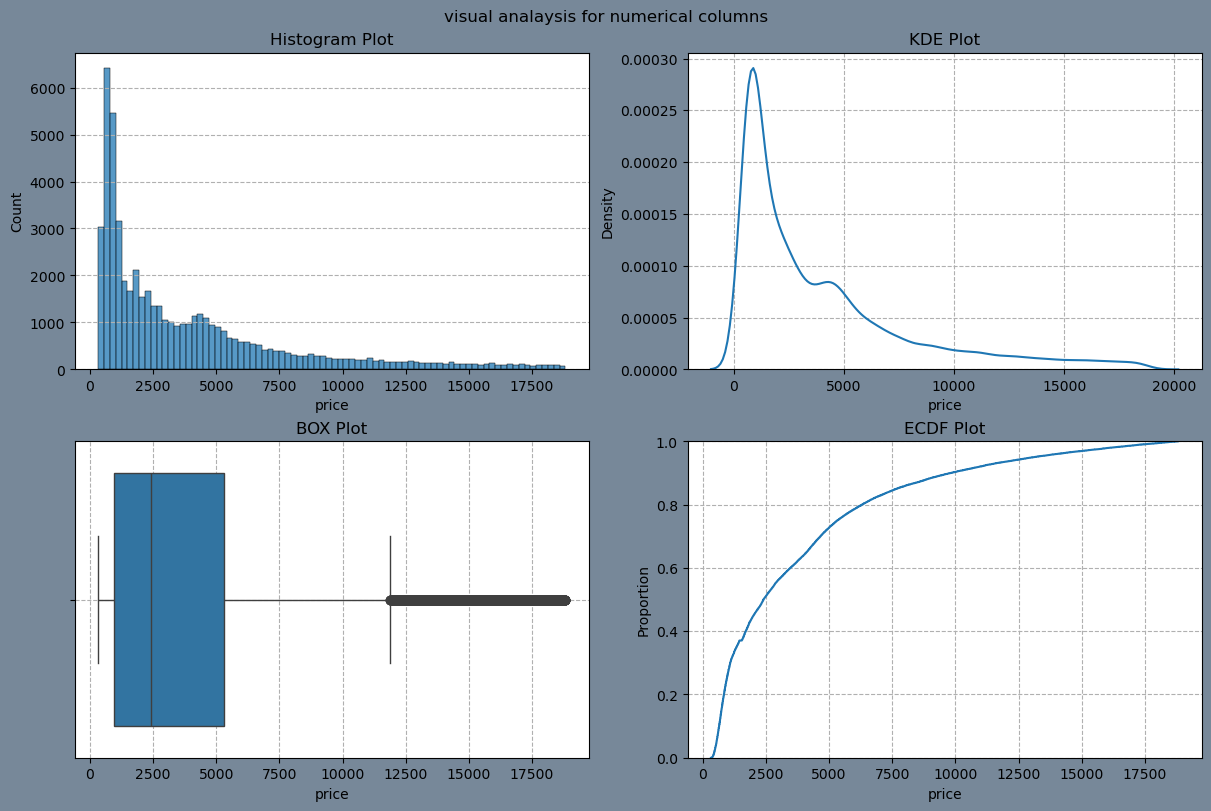

In [30]:
fig,axs = plt.subplots(2,2, figsize=(12,8),facecolor="lightslategray",constrained_layout=True)
fig.suptitle("visual analaysis for numerical columns")

axs[0,0].set_title("Histogram Plot")
sns.histplot(data=df,x="price",ax=axs[0,0])
axs[0,0].grid(axis="y",linestyle="--",alpha=1)

axs[0,1].set_title("KDE Plot")
sns.kdeplot(data=df,x="price",ax=axs[0,1])
axs[0,1].grid(linestyle="--",alpha=1)

axs[1,0].set_title("BOX Plot")
sns.boxplot(data=df,x="price",ax=axs[1,0])
axs[1,0].grid(linestyle="--",alpha=1)

axs[1,1].set_title("ECDF Plot")
sns.ecdfplot(data=df,x="price",ax=axs[1,1])  
axs[1,1].grid(linestyle="--",alpha=1)

#### <span style="color:green;">visual analaysis for categorical column</span>

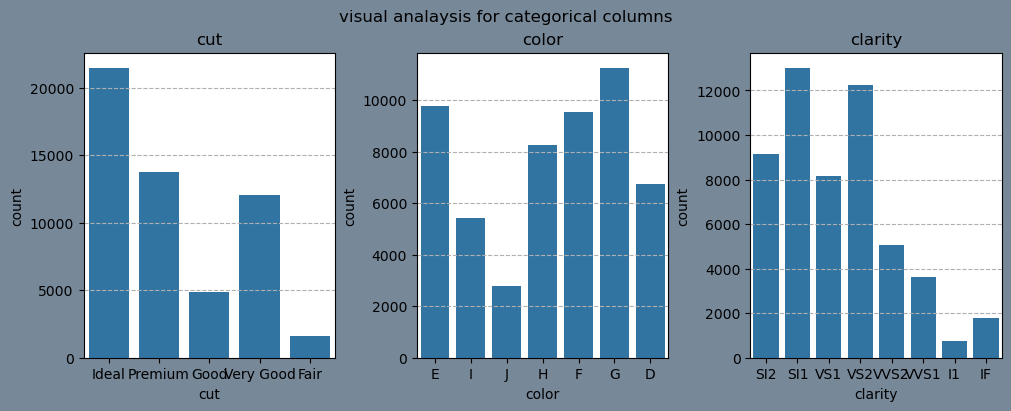

In [32]:
fig,axs = plt.subplots(1,3, figsize=(10,4),facecolor="lightslategray",constrained_layout=True)
fig.suptitle("visual analaysis for categorical columns")

axs[0].set_title("cut")
sns.countplot(data=df,x="cut",ax=axs[0])
axs[0].grid(axis="y",linestyle="--",alpha=1)

axs[1].set_title("color")
sns.countplot(data=df,x="color",ax=axs[1])
axs[1].grid(axis="y",linestyle="--",alpha=1)

axs[2].set_title("clarity")
sns.countplot(data=df,x="clarity",ax=axs[2])
axs[2].grid(axis="y",linestyle="--",alpha=1)


### <span style="color:orange;">BIVARIATE ANALYSIS </span>

#### <span style="color:green;">Any relation between Numerical and Numerical</span>

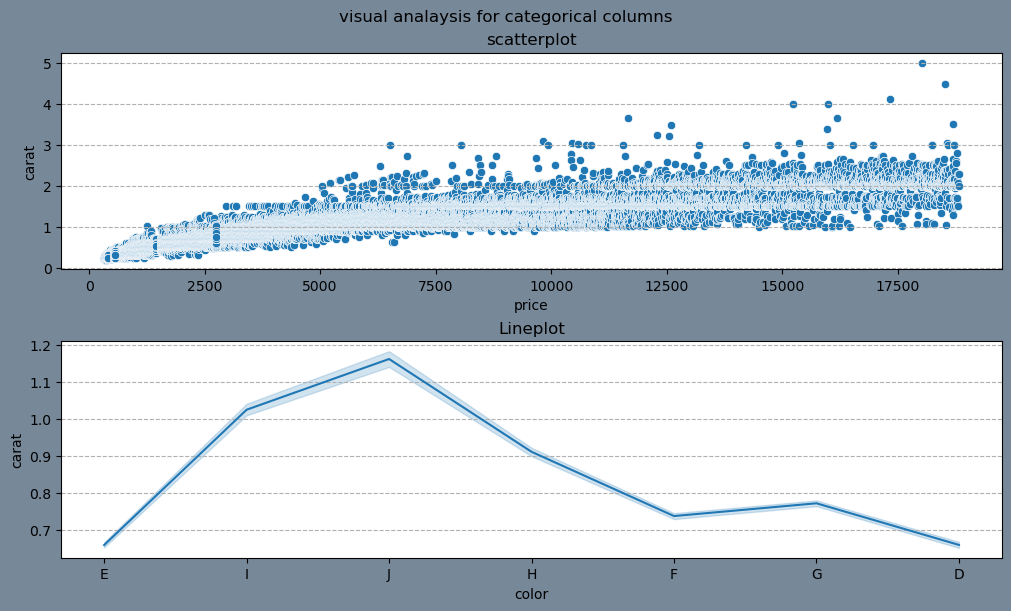

In [35]:
fig,axs = plt.subplots(2,1, figsize=(10,6),facecolor="lightslategray",constrained_layout=True)
fig.suptitle("visual analaysis for categorical columns")

axs[0].set_title("scatterplot")
sns.scatterplot(data=df,x="price",y="carat",ax=axs[0])
axs[0].grid(axis="y",linestyle="--",alpha=1)

axs[1].set_title("Lineplot")
sns.lineplot(data=df,x="color",y="carat",ax=axs[1])
axs[1].grid(axis="y",linestyle="--",alpha=1)

#### <span style="color:green;">Any reltion between Numerical and Categorical</span>

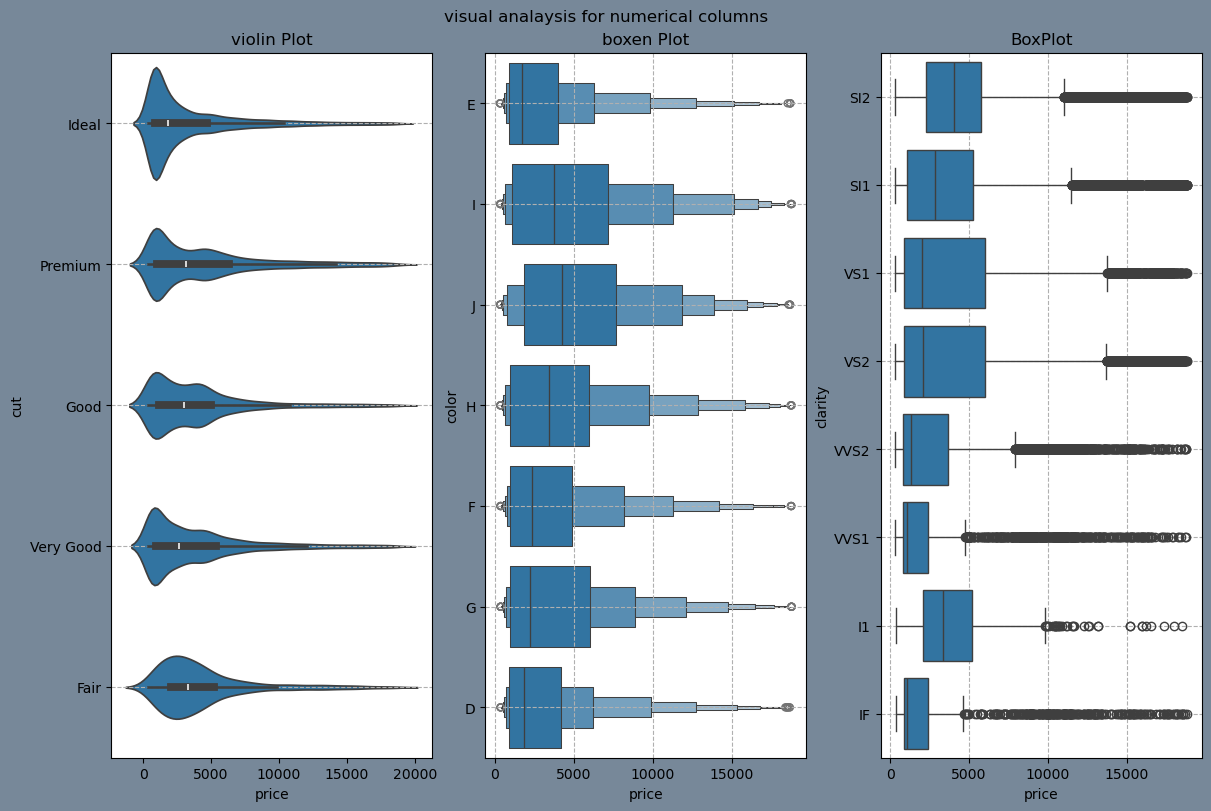

In [71]:
fig,axs = plt.subplots(1,3, figsize=(12,8),facecolor="lightslategray",constrained_layout=True)
fig.suptitle("visual analaysis for numerical columns")

axs[0].set_title("violin Plot")
sns.violinplot(data=df,x="price",y="cut",ax=axs[0])
axs[0].grid(axis="y",linestyle="--",alpha=1)

axs[1].set_title("boxen Plot")
sns.boxenplot(data=df,x="price",y="color",ax=axs[1])
axs[1].grid(linestyle="--",alpha=1)

axs[2].set_title("BoxPlot")
sns.boxplot(data=df,x="price",y="clarity",ax=axs[2])
axs[2].grid(linestyle="--",alpha=1)


#### <span style="color:orange;">MULTIVARIATE ANALYSIS </span>

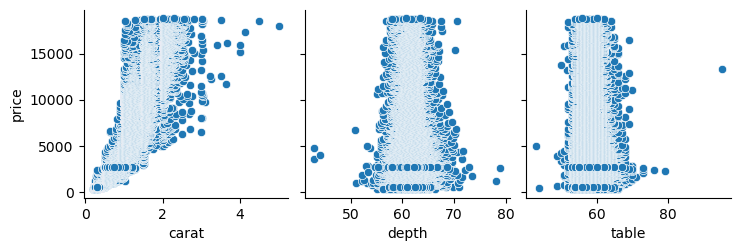

In [96]:
sns.pairplot(data=df,x_vars=['carat', 'depth', 'table'],y_vars=["price"])

<Axes: >

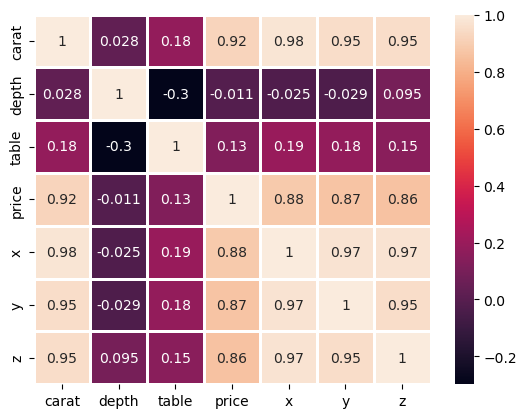

In [87]:
sns.heatmap(num_df.corr(),annot=True,linewidth=0.8)

### <span style="color:orange;">BUILDING ML MODEL</span>

In [98]:
X = df.drop(columns=["price"])

In [100]:
y = df["price"]

In [102]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [104]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [110]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
38685,0.30,Ideal,F,VVS1,61.1,55.0,4.36,4.38,2.67
6026,1.00,Very Good,D,SI2,63.2,56.0,6.38,6.33,4.02
26499,2.01,Very Good,H,SI2,63.4,57.0,8.00,7.93,5.05
28444,0.31,Ideal,G,VVS2,61.5,57.0,4.32,4.36,2.67
16616,1.21,Premium,H,SI1,60.2,58.0,6.93,6.88,4.16


In [112]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [114]:
X_train_num = X_train.select_dtypes(include=["int","float"])
X_train_cat = X_train.select_dtypes(include=["object"])

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),columns=scaler.get_feature_names_out(),index=X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781


In [138]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [148]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1, 
                                 encoded_missing_value=-5)

X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),columns=ordinal_encoder.get_feature_names_out(),index=X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
38685,4.0,4.0,6.0
6026,2.0,6.0,1.0
26499,2.0,2.0,1.0
28444,4.0,3.0,5.0
16616,3.0,2.0,2.0


In [150]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)

In [152]:
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
38685,-1.051952,-0.455192,-1.107077,-1.224342,-1.177979,-1.250507,4.0,4.0,6.0
6026,0.429781,1.015185,-0.657431,0.581138,0.518920,0.695929,2.0,6.0,1.0
26499,2.567710,1.155221,-0.207785,2.029097,1.911248,2.180987,2.0,2.0,1.0
28444,-1.030784,-0.175120,-0.207785,-1.260094,-1.195383,-1.250507,4.0,3.0,5.0
16616,0.874301,-1.085354,0.241860,1.072729,0.997533,0.897781,3.0,2.0,2.0


In [154]:
X_test_num = X_test.select_dtypes(include=["int","float"])
X_test_cat = X_test.select_dtypes(include=["object"])

In [162]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),columns=scaler.get_feature_names_out(),index=X_test_num.index)

In [164]:
X_test_transformed.head()

,carat,depth,table,x,y,z
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350


In [166]:
X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat),columns=ordinal_encoder.get_feature_names_out(),index=X_test_cat.index)

In [168]:
X_test_cat_transformed.head()

,cut,color,clarity
28297,4.0,1.0,6.0
17356,4.0,3.0,3.0
48882,3.0,0.0,4.0
19901,4.0,6.0,3.0
44377,2.0,3.0,4.0


In [170]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)

In [172]:
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
28297,-1.178958,0.385023,-0.207785,-1.563987,-1.552167,-1.538867,4.0,1.0,6.0
17356,0.450949,0.595077,-0.657431,0.607952,0.614643,0.695929,4.0,3.0,3.0
48882,-0.141745,-1.085354,0.241860,0.125299,0.075116,-0.024973,3.0,0.0,4.0
19901,0.535619,-0.525210,-0.657431,0.724146,0.762578,0.681511,4.0,6.0,3.0
44377,-0.586264,0.034934,0.241860,-0.482487,-0.499219,-0.486350,2.0,3.0,4.0


In [174]:
from sklearn.linear_model import LinearRegression

Regressor = LinearRegression()

Regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [176]:
y_test_pred = Regressor.predict(X_test_transformed)

In [178]:
from sklearn import metrics

metrics.mean_absolute_error(y_test,y_test_pred)

813.46622107992

In [182]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 381.6959327831065

CPU times: user 231 ms, sys: 17.3 ms, total: 249 ms
Wall time: 334 ms


In [184]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 355.3348204327459

CPU times: user 219 ms, sys: 16.2 ms, total: 236 ms
Wall time: 299 ms


In [186]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 267.1522596457871

CPU times: user 10.6 s, sys: 147 ms, total: 10.7 s
Wall time: 10.8 s
